In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt 
import yfinance as yf 
from numpy import linalg as LA 

In [3]:
lista_acoes = ['WEGE3', 'PCAR3', 'LREN3', 'PETR4', 'VALE3']
lista_acoes = [acao + ".SA" for acao in lista_acoes]

data_final = dt.datetime.now()
data_inicial = data_final - dt.timedelta(days=300)

precos = yf.download(lista_acoes, data_inicial, data_final)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [9]:
retornos = precos.pct_change().dropna()
media_retornos = retornos.mean()
matriz_covariancia = retornos.cov()
pesos_carteira = np.full(len(lista_acoes), 1/len(lista_acoes))
numero_acoes = len(lista_acoes)

pesos_carteira

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [10]:
numero_simulacoes = 10000
dias_projetados = 252
capital_inicial = 1000

In [11]:
retorno_medio = retornos.mean(axis = 0).to_numpy()
matriz_retorno_medio = retorno_medio * np.ones(shape = (dias_projetados, numero_acoes))

In [12]:
L = LA.cholesky(matriz_covariancia)
L

array([[ 0.03022675,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.01180888,  0.05844257,  0.        ,  0.        ,  0.        ],
       [ 0.00257178, -0.00244374,  0.01863741,  0.        ,  0.        ],
       [ 0.00517941, -0.00025868,  0.00352402,  0.01591445,  0.        ],
       [ 0.00399688,  0.00137233, -0.00067321,  0.00177092,  0.01566781]])

In [15]:
retornos_carteira = np.zeros([dias_projetados, numero_simulacoes])

montante_final = np.zeros(numero_simulacoes)

for s in range(numero_simulacoes):
    Rpdf = np.random.normal(size=(dias_projetados, numero_acoes))

    retornos_sinteticos = matriz_retorno_medio + np.inner(Rpdf, L)

    retornos_carteira[:, s] = np.cumprod(np.inner(pesos_carteira, retornos_sinteticos)+ 1)* capital_inicial
    montante_final[s] = retornos_carteira[-1, s]

retornos_carteira

array([[1020.23433591,  999.14354223,  987.63917271, ..., 1029.56930397,
        1014.86641301,  977.44674987],
       [ 995.65844786, 1016.89541054,  957.28468842, ..., 1007.4929066 ,
        1006.00565512,  984.16452007],
       [1008.280879  , 1009.7474196 ,  967.14611217, ..., 1001.29144735,
        1022.20669225,  967.84027908],
       ...,
       [ 982.84014746, 1145.67900015,  840.41550115, ...,  980.18045828,
        1456.00543344, 1026.5120131 ],
       [1010.50809048, 1148.07308862,  838.41320113, ...,  984.59642836,
        1493.51334163, 1024.41360887],
       [1030.11797045, 1144.63209034,  860.43754374, ...,  977.02149309,
        1483.29860971, 1031.55093272]])

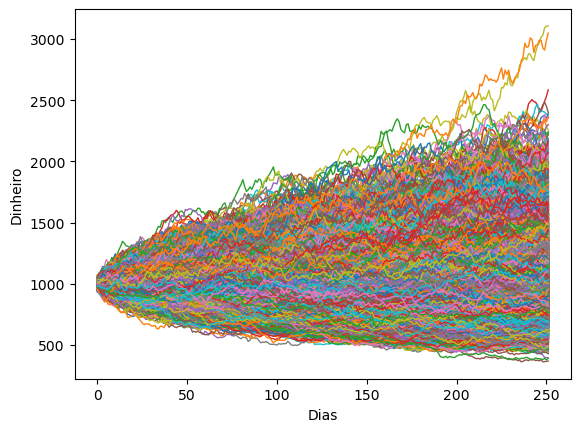

In [16]:
plt.plot(retornos_carteira, linewidth=1)
plt.ylabel('Dinheiro')
plt.xlabel('Dias')
plt.show()

In [17]:
montante_99 = str(np.percentile(montante_final, 1))
montante_95 = str(np.percentile(montante_final, 5))
montante_mediano = str(np.percentile(montante_final, 50))
cenarios_com_lucro = str((len(montante_final[montante_final > 1000])/ len(montante_final)) * 100) + '%'

In [19]:
print(f'''Ao investir R$ 1000,00 na carteira {lista_acoes}, podemos esperar esses resultados para o próximos anos,utilizando o método de Monte Carlo com 10 mil simulações:

Com 50% de probabilidade, o montante será maior que R$ {montante_mediano}.

Com 95% de probabilidade, o montante será maior que R$ {montante_95}.

em {cenarios_com_lucro} dos cenários, foi possível obter lucro no próximo ano.''')

Ao investir R$ 1000,00 na carteira ['WEGE3.SA', 'PCAR3.SA', 'LREN3.SA', 'PETR4.SA', 'VALE3.SA'], podemos esperar esses resultados para o próximos anos,utilizando o método de Monte Carlo com 10 mil simulações:

Com 50% de probabilidade, o montante será maior que R$ 990.9191871896417.

Com 95% de probabilidade, o montante será maior que R$ 637.7714637815725.

em 48.65% dos cenários, foi possível obter lucro no próximo ano.


<function matplotlib.pyplot.show(close=None, block=None)>

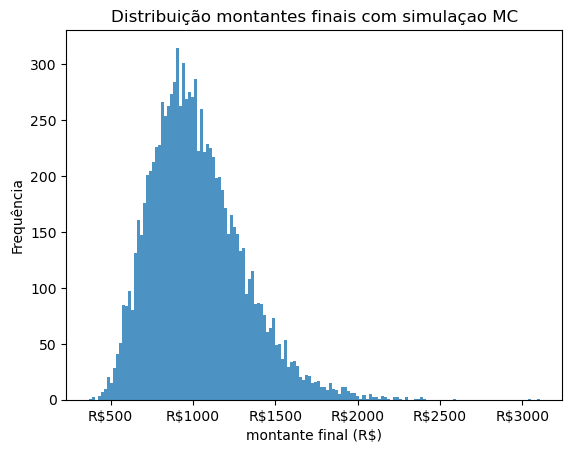

In [22]:
config =dict(histtype = "stepfilled", alpha = 0.8, density = False, bins = 150)
fig, ax = plt.subplots()
ax.hist(montante_final, **config)
ax.xaxis.set_major_formatter('R${x:.0f}')
plt.title('Distribuição montantes finais com simulaçao MC')
plt.xlabel('montante final (R$)')
plt.ylabel('Frequência')
plt.show